In [1]:
#import packages
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#read in data from csv this is from a premier league game Southampton vs Bournemouth in 2019
#I scrpaed this data from understat. I would recommend checking out the tutorial on scraping understat on my Youtube channel
#https://www.youtube.com/c/McKayJohns
df = pd.read_csv('xgtutorial.csv')

In [3]:
df

,Unnamed: 0,minute,team,xG,player,result
0,0,1,Southampton,0.105402,Nathan Redmond,BlockedShot
1,1,2,Southampton,0.136320,Jan Bednarek,BlockedShot
2,2,2,Southampton,0.037217,Oriol Romeu,BlockedShot
3,3,2,Southampton,0.021404,James Ward-Prowse,BlockedShot
4,4,3,Southampton,0.066363,Pierre-Emile Højbjerg,BlockedShot
5,5,9,Southampton,0.363826,Nathan Redmond,SavedShot
6,6,11,Southampton,0.354095,Shane Long,Goal
7,7,17,Southampton,0.036274,Nathan Redmond,MissedShots
8,8,21,Southampton,0.076804,Danny Ings,MissedShots
9,9,23,Southampton,0.380378,Shane Long,SavedShot


In [4]:
#now that we have our dataframe set up, we are going to create some lists to plot the different xG values
#4 lists - home and away xg and minutes
#We start these with zero so our charts will start at 0
a_xG = [0]
h_xG= [0]
a_min = [0]
h_min = [0]


#this finds our team names from the dataframe. This will only work as long as both teams took a shot
hteam = df['team'].iloc[0]
ateam = df['team'].iloc[-1]

for x in range(len(df['xG'])):
    if df['team'][x]==ateam:
        a_xG.append(df['xG'][x])
        a_min.append(df['minute'][x])
    if df['team'][x]==hteam:
        h_xG.append(df['xG'][x])
        h_min.append(df['minute'][x])
        

In [5]:
len(a_xG), len(h_xG), len(a_min), len(h_min), len(df)

(10, 23, 10, 23, 31)

In [8]:
h_xG

[0,
 0.1054020971059799,
 0.136319562792778,
 0.0372170321643352,
 0.0214042738080024,
 0.0663633570075035,
 0.3638263642787933,
 0.3540951907634735,
 0.0362738892436027,
 0.0768037065863609,
 0.380378007888794,
 0.6089562177658081,
 0.0276359431445598,
 0.0264540147036314,
 0.0339079499244689,
 0.4294915795326233,
 0.0219945963472127,
 0.0506199821829795,
 0.0534969829022884,
 0.0866899117827415,
 0.0117352697998285,
 0.0232735332101583,
 0.0181721448898315]

In [9]:
h_min

[0,
 1,
 2,
 2,
 2,
 3,
 9,
 11,
 17,
 21,
 23,
 23,
 47,
 49,
 54,
 57,
 58,
 60,
 60,
 66,
 71,
 79,
 81]

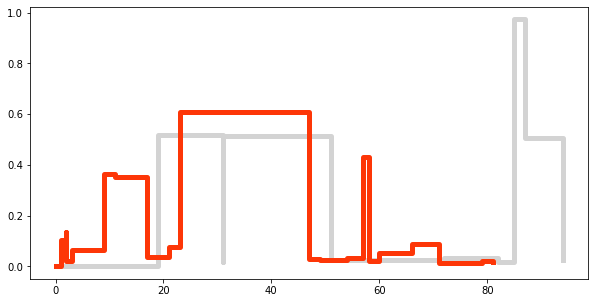

In [7]:
fig, ax = plt.subplots(figsize = (10,5))
#plot the step graphs
ax.step(x=a_min,y=a_xG,color='#d3d3d3',label=ateam,linewidth=5,where='post')
ax.step(x=h_min,y=h_xG,color='#fd3607',label=ateam,linewidth=5,where='post')

In [7]:

#this is the function we use to make our xG values be cumulative rather than single shot values
#it goes through the list and adds the numbers together
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cumulative = nums_cumulative_sum(a_xG)
h_cumulative = nums_cumulative_sum(h_xG)

#this is used to find the total xG. It just creates a new variable from the last item in the cumulative list
alast = round(a_cumulative[-1],2)
hlast = round(h_cumulative[-1],2)

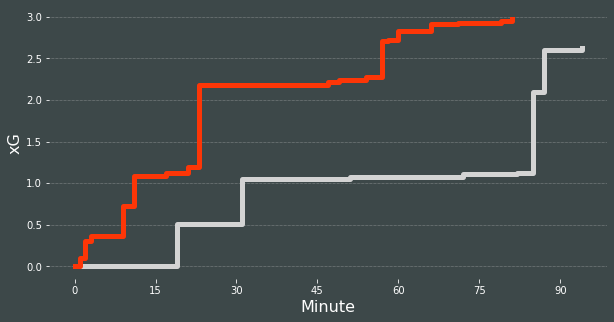

In [12]:
fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

#set up our base layer
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)
        
plt.xticks([0,15,30,45,60,75,90])
plt.xlabel('Minute',fontname='Andale Mono',color='white',fontsize=16)
plt.ylabel('xG',fontname='Andale Mono',color='white',fontsize=16)

#plot the step graphs
ax.step(x=a_min,y=a_cumulative,color='#d3d3d3',label=ateam,linewidth=5,where='post')
ax.step(x=h_min,y=h_cumulative,color='#fd3607',label=ateam,linewidth=5,where='post')